# <center> **BANK CUSTOMER  CHURN MODEL** </center> <br/> <div style = "text-align:right"> *Harish Chandra ...* </div>

**Objectives:**


1.   Data Encoding
2.   Feature Scaling
3.   Handling Imbalance Data
4.   Support Vector Machine Classifier
5.   Grid Searchfor Hyperparameter Tunning



In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

In [5]:
bccm = pd.read_csv("Bank Churn Modelling.csv")

In [6]:
bccm.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
bccm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
bccm.describe

<bound method NDFrame.describe of       CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure   
0       15634602   Hargrave          619    France  Female   42       2  \
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  Num Of Products  Has Credit Card  Is Active Memb

In [9]:
bccm.duplicated('CustomerId').sum()

0

In [10]:
bccm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


**Encoding**

In [11]:
bccm['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
bccm.replace({'Geography': {'France': 2, 'Germany':1, 'Spain':0}}, inplace=True)

In [13]:
bccm['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
bccm.replace({'Gender': {'Male':0, 'Female':2, }}, inplace=True)

In [15]:
bccm['Gender'].value_counts()

Gender
0    5457
2    4543
Name: count, dtype: int64

In [16]:
bccm['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [17]:
bccm.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [18]:
bccm['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [19]:
bccm['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [20]:
bccm.loc[(bccm['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [21]:
bccm['Zero Balance'] = np.where(bccm['Balance']>0, 1,0)

<Axes: >

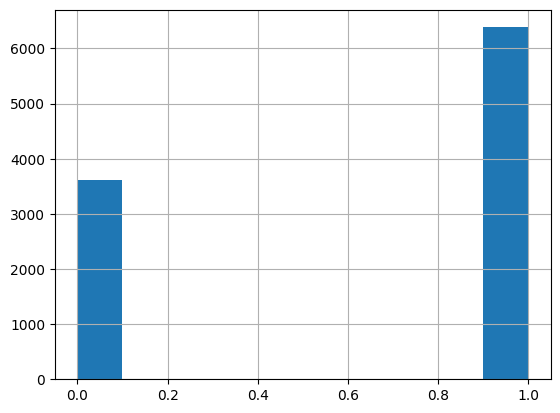

In [22]:
bccm['Zero Balance'].hist()

In [23]:
bccm.groupby(['Churn', 'Geography']).count()

CustomerId  Surname  CreditScore  Gender   Age  Tenure   
Churn Geography                                                           
0     0                2064     2064         2064    2064  2064    2064  \
      1                1695     1695         1695    1695  1695    1695   
      2                4204     4204         4204    4204  4204    4204   
1     0                 413      413          413     413   413     413   
      1                 814      814          814     814   814     814   
      2                 810      810          810     810   810     810   

                 Balance  Num Of Products  Has Credit Card  Is Active Member   
Churn Geography                                                                
0     0             2064             2064             2064              2064  \
      1             1695             1695             1695              1695   
      2             4204             4204             4204              4204   
1     0              413              413              413               413   
      1              814              814              814               814   
      2              810              810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

**Define Labels and Features**

In [24]:
bccm.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [25]:
x = bccm.drop(['Surname', 'Churn'], axis = 1)

In [26]:
y = bccm['Churn']

In [27]:
x.shape, y.shape

((10000, 12), (10000,))

**Handling Imbalance Data**

In [28]:
bccm['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

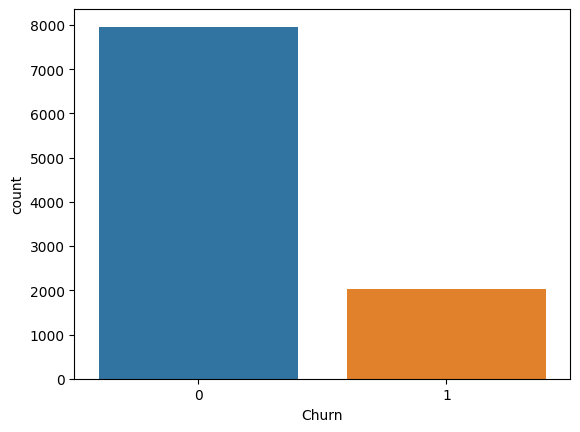

In [29]:
sns.countplot(x = 'Churn', data = bccm);

In [30]:
x.shape, y.shape

((10000, 12), (10000,))

**Random Under Sampling**

In [31]:
from imblearn.under_sampling import RandomUnderSampler

In [32]:
 rus = RandomUnderSampler(random_state=2529)

In [33]:
x_rus, y_rus = rus.fit_resample(x,y)

In [34]:
x_rus.shape, y_rus.shape, x.shape, y.shape

((4074, 12), (4074,), (10000, 12), (10000,))

In [35]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [36]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

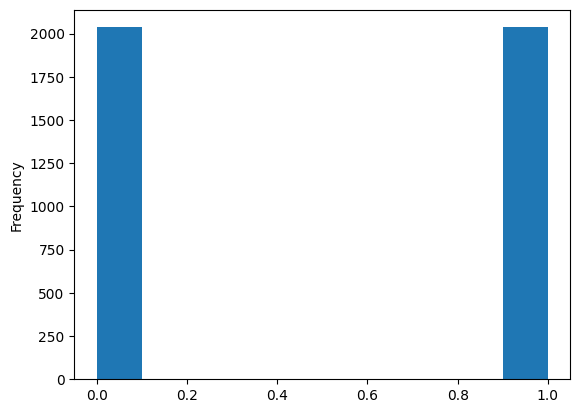

In [37]:
y_rus.plot(kind = 'hist')

**Random Over Sampling**

In [38]:
from imblearn.over_sampling import RandomOverSampler

In [39]:
ros = RandomOverSampler(random_state=2529)

In [40]:
x_ros, y_ros = ros.fit_resample(x,y)

In [41]:
x_ros.shape, y_ros.shape, x.shape, y.shape

((15926, 12), (15926,), (10000, 12), (10000,))

In [42]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

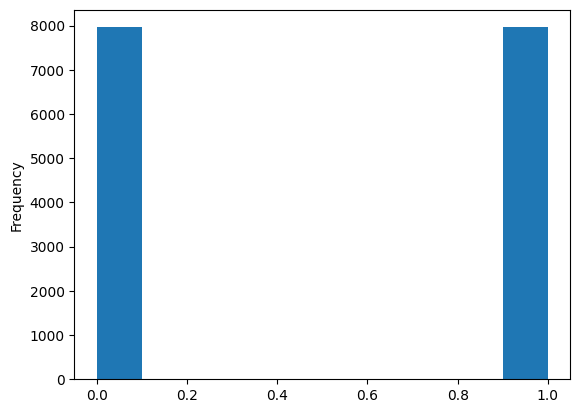

In [43]:
y_ros.plot(kind = 'hist')

***Train Test Split***

In [44]:
from sklearn.model_selection import train_test_split

**split original Data**

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2529)

**Split Random Under Sample Data**

In [46]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.3)

**Split Random Over Sample Data**

In [47]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size=0.3)

**Standardize Features**

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc = StandardScaler()

**Standardize Original Data**

In [50]:
x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]= sc.fit_transform(x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [51]:
x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]= sc.fit_transform(x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

**Standardize Random User Data**

In [52]:
x_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]= sc.fit_transform(x_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [53]:
x_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]= sc.fit_transform(x_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

**Standardize Random Over Data**

In [54]:
x_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]= sc.fit_transform(x_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [55]:
x_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]= sc.fit_transform(x_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

**Support Vector Machine Classifier**

In [56]:
from sklearn.svm import SVC

In [57]:
svc = SVC()

In [58]:
svc.fit(x_train, y_train)

SVC()

In [59]:
y_pred = svc.predict(x_test)

**Model Accuracy**

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
confusion_matrix(y_test, y_pred)

array([[2414,    0],
       [ 586,    0]], dtype=int64)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

**Hyperparameter Tunning**

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {'C':[0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [65]:
grid =  GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   9.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   8.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   8.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   9.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   9.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [66]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [67]:
grid_prediction = grid.predict(x_test)

In [68]:
confusion_matrix(y_test,grid_prediction)

array([[2414,    0],
       [ 586,    0]], dtype=int64)

In [69]:
print(classification_report(y_test,grid_prediction))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

**Model with Random Under Sampling**

In [70]:
svc_rus = SVC()

In [71]:
svc_rus.fit(x_train_rus, y_train_rus)

SVC()

In [72]:
y_pred_rus= svc_rus.predict(x_test_rus)

**Model Accuracy**

In [73]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[  0, 633],
       [  0, 590]], dtype=int64)

In [74]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       633
           1       0.48      1.00      0.65       590

    accuracy                           0.48      1223
   macro avg       0.24      0.50      0.33      1223
weighted avg       0.23      0.48      0.31      1223



C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

**Hyperparameter Tunning**

In [75]:
param_grid = {'C':[0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [76]:
grid_rus =  GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

**Model with Random Over Sampling**

In [77]:
svc_ros = SVC()

In [78]:
svc_ros.fit(x_train_ros, y_train_ros)

SVC()

In [79]:
y_pred_ros = svc_ros.predict(x_test_ros)

**Model Accuracy**

In [80]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[   0, 2402],
       [   0, 2376]], dtype=int64)

In [81]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2402
           1       0.50      1.00      0.66      2376

    accuracy                           0.50      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.25      0.50      0.33      4778



C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

**Hyperparameter Tunning**

In [82]:
param_grid = {'C':[0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [83]:
grid_ros =  GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  15.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  16.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  15.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  15.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=  16.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=  15.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=  15.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=  15.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  15.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=  14.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=  15.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [84]:
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [85]:
grid_predictions_ros = grid_ros.predict(x_test_ros)

In [86]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2402,    0],
       [ 146, 2230]], dtype=int64)

In [87]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2402
           1       1.00      0.94      0.97      2376

    accuracy                           0.97      4778
   macro avg       0.97      0.97      0.97      4778
weighted avg       0.97      0.97      0.97      4778



**Lets Compare**

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [89]:
print(classification_report(y_test, grid_prediction))

C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       633
           1       0.48      1.00      0.65       590

    accuracy                           0.48      1223
   macro avg       0.24      0.50      0.33      1223
weighted avg       0.23      0.48      0.31      1223



C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [91]:
print(classification_report(y_test_ros, y_pred_ros))

C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2402
           1       0.50      1.00      0.66      2376

    accuracy                           0.50      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.25      0.50      0.33      4778



C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hc782\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## <center> ... End of the project ... </center><br/> <center> Thank You </center>